In [1]:
#%%
import os
import pandas as pd
from dotenv import load_dotenv
from app.pg import DatabasePostgre, Table
from pandas_profiling import ProfileReport

#%%
load_dotenv()
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASS = os.getenv('DB_PASS')
DB_NAME = os.getenv('DB_NAME')
DB_HOST = os.getenv('DB_HOST')
DB_PORT = os.getenv('DB_PORT')

#%%
ib = DatabasePostgre(dialect='postgresql', driver='psycopg2', db=DB_NAME, user=DB_USER, password=DB_PASS, host=DB_HOST, port=DB_PORT)

coletas_silver = Table('coletas', ib, 'silver')
df_coletas = coletas_silver.read()

setup_silver = Table('setup', ib, 'silver')
df_setup = setup_silver.read()
#%%
type(df_coletas)

C:\Users\maiar\AppData\Local\Temp\ipykernel_19536\133714238.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Engine created successfully
Database connected successfully


C:\Users\maiar\OneDrive\Data Material\Ascential - Analytics Engineering\app\pg.py:95: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql=sql, con=self.db.connection)


pandas.core.frame.DataFrame

In [2]:
df_coletas.dtypes

DateIns                           object
Screenshot                        object
Available                          int64
Unavailable                        int64
SuggestedPrice                   float64
FinalPrice                       float64
MasterKey_RetailerProduct         object
RandomPrecosNegativos              int64
RandomPrecosMissing              float64
RandomPrecosDiscrepantes           int64
RandomPrecosDiscrepantesFator    float64
dtype: object

In [3]:
df_coletas['DateIns'] = df_coletas['DateIns'].apply(lambda x: pd.Timestamp(x))

In [4]:
df = df_coletas.merge(df_setup, on='MasterKey_RetailerProduct')

In [8]:
profile = ProfileReport(df=df, infer_dtypes=True)

In [9]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
coletas_profile.to_widgets()

In [12]:
df['EAN'].nunique()

1980

In [13]:
df['Customer'].nunique()

4

In [14]:
df['Retailer'].nunique()

120

In [17]:
df.groupby(['Customer', 'Retailer']).agg({'EAN': ['count', 'nunique']})

EAN        
                                   count nunique
Customer Retailer                               
Aché     A Nossa Drogaria          55710     914
         Araujo                    55754     914
         DrogaRaia                 55754     914
         DrogaSil                  55754     914
         Drogal                    55754     914
...                                  ...     ...
Unilever Supermercado Mambo        18423     303
         Supermercado Pague Menos  18422     302
         Tenda Drive               12688     208
         Venancio                  13737     227
         Zona Sul                  20924     344

[165 rows x 2 columns]

In [ ]:
retailer_customer = df.groupby(['Retailer']).agg({'Customer': ['count', 'nunique']})

In [39]:
retailer_customer[('Customer', 'nunique')].value_counts()

(Customer, nunique)
1    87
2    21
3    12
Name: count, dtype: int64

In [40]:
retailer_customer[retailer_customer[('Customer', 'nunique')] == 2]

Customer        
                            count nunique
Retailer                                 
Amazon                      33005       2
Angeloni - Supermercado     31481       2
Apoio Entrega               16321       2
Drogarias Globo             66921       2
Drogarias Tamoio            67063       2
Farmacia São João           67731       2
Farmácia Indiana            69427       2
Ikesaki                     24465       2
Lojas Rede                  24465       2
Magazine Luiza              33006       2
Mercado Livre               21298       2
Muffato                     30810       2
Nordestão                   28308       2
Pão de Açucar               28376       2
Savegnago                   25875       2
Sonda Delivery              28309       2
Sou Justo                   33853       2
SuperNosso                  24469       2
Supermercado Mambo          25875       2
Supermercado Pague Menos    28308       2
Zona Sul                    28376       2

In [44]:
total = retailer_customer[('Customer', 'count')].sum()
retailer_customer[('Customer', '%')] = retailer_customer.apply(lambda x: x[('Customer', 'count')]/total, axis=1)

In [47]:
retailer_customer[('Customer', '%')].sum()

1.0

In [45]:
retailer_customer.sort_values(('Customer', '%'), ascending=False)

Customer                  
                  count nunique         %
Retailer                                 
DrogaSil          82134       3  0.021765
DrogaRaia         82134       3  0.021765
Pague Menos       82127       3  0.021763
Panvel            82122       3  0.021762
Drogaria SP       82111       3  0.021759
...                 ...     ...       ...
Koch               7452       1  0.001975
Festval            7452       1  0.001975
ComperDelivery     7452       1  0.001975
Atacadão           5860       1  0.001553
Drogão Super         44       1  0.000012

[120 rows x 3 columns]

In [176]:
features = df[df['SuggestedPrice'] > 1][['Available', 'SuggestedPrice', 'FinalPrice', 'MasterKey_RetailerProduct', 'Customer', 'Brand', 'EAN', 'Product', 'Retailer']]

In [180]:
def pct_change(x):
    try:
        result = (x['FinalPrice'] - x['SuggestedPrice']) / x['SuggestedPrice']
        return result
    except:
        return np.nan
        
        

features['Pct_Var_Price'] = df.apply(lambda x: pct_change(x), axis=1)

In [182]:
features.tail(50)

Available  SuggestedPrice  FinalPrice  \
3773498          0           26.90         NaN   
3773499          0           26.90         NaN   
3773500          0           26.90         NaN   
3773501          0           26.90         NaN   
3773502          0           26.90         NaN   
3773503          0           26.90         NaN   
3773504          0           26.90         NaN   
3773505          0           26.90         NaN   
3773506          0           26.90         NaN   
3773507          0           26.90         NaN   
3773508          0           26.90         NaN   
3773509          0           26.90         NaN   
3773510          0           26.90         NaN   
3773511          0           26.90         NaN   
3773512          0           26.90         NaN   
3773513          0           26.90         NaN   
3773514          0           26.90         NaN   
3773515          0           26.90         NaN   
3773540          0           34.90         NaN   
3773541          0           34.90         NaN   
3773542          0           34.90         NaN   
3773543          0           34.90         NaN   
3773544          0           34.90         NaN   
3773589          0            8.00         NaN   
3773590          0            8.00         NaN   
3773591          0            8.00         NaN   
3773592          0            4.70         NaN   
3773593          0            4.70         NaN   
3773594          0            4.70         NaN   
3773595          0            4.70         NaN   
3773596          0            4.70         NaN   
3773597          1           16.41       19.99   
3773598          1           16.41       19.99   
3773599          1           16.41       19.99   
3773600          1           16.41       19.99   
3773601          1           16.41       19.99   
3773602          1           22.90       26.49   
3773603          1           22.90       26.49   
3773604          1           22.90       26.49   
3773605          1           22.90       26.49   
3773606          1           22.90       26.49   
3773607          0           87.90         NaN   
3773608          0           87.90         NaN   
3773609          0           87.90         NaN   
3773610          0           87.90         NaN   
3773611          0           87.90         NaN   
3773612          1            6.20        7.39   
3773613          1            6.20        7.39   
3773614          1            6.20        7.99   
3773615          1            6.20        7.99   

                                 MasterKey_RetailerProduct    Customer  \
3773498   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773499   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773500   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773501   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773502   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773503   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773504   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773505   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773506   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773507   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773508   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773509   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773510   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773511   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773512   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773513   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773514   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773515   BRBeiersdorf400590092159888060-03300-00Sou Justo  Beiersdorf   
3773540  BRBeiersdorf400590093586185281-03301-49Supe

In [64]:
def _10th(x):
    return x.quantile(0.10)
def _25th(x):
    return x.quantile(0.25)
def _50th(x):
    return x.quantile(0.50)
def _75th(x):
    return x.quantile(0.75)
def _90th(x):
    return x.quantile(0.90)

In [70]:
agg_df = features.groupby(['Retailer', 'Customer', 'Product']).agg({'Pct_Var_Price': [_10th, _25th, _50th, _75th, _90th], 'Available':'mean'})

In [71]:
agg_df.groupby(['Retailer', 'Customer']).agg({('Pct_Var_Price', '_10th'):'mean', 
                                              ('Pct_Var_Price', '_25th'):'mean', 
                                              ('Pct_Var_Price', '_50th'):'mean', 
                                              ('Pct_Var_Price', '_75th'):'mean', 
                                              ('Pct_Var_Price', '_90th'):'mean', 
                                              ('Pct_Var_Price', '_10th'):'mean', 
                                              ('Available', 'mean'):'mean'})

Pct_Var_Price                      \
                                           _10th     _25th     _50th   
Retailer                Customer                                       
Amazon                  Beiersdorf      0.022983  0.057713  0.120913   
                        Unilever       -0.136825 -0.090582 -0.035031   
Amazon - Apoteca        Beiersdorf     -0.138524 -0.131069 -0.108635   
Amazon - Sages          Unilever       -0.187690 -0.162372 -0.144345   
Angeloni - Supermercado Beiersdorf     -0.195489 -0.194894 -0.183229   
...                                          ...       ...       ...   
Ultrafarma              Beiersdorf     -0.017314  0.006404  0.031621   
Venancio                Beiersdorf     -0.046608  0.018355  0.253521   
                        Unilever       -0.144457 -0.123745 -0.061266   
Zona Sul                Beiersdorf     -0.132108 -0.132108 -0.132108   
                        Unilever       -0.197349 -0.181468 -0.145381   

                                                       Available  
                                       _75th     _90th      mean  
Retailer                Customer                                  
Amazon                  Beiersdorf  0.216837  0.293833  0.686137  
                        Unilever    0.024742  0.075988  0.810376  
Amazon - Apoteca        Beiersdorf -0.083327 -0.044434  0.345979  
Amazon - Sages          Unilever   -0.123065 -0.084955  0.591710  
Angeloni - Supermercado Beiersdorf -0.180659 -0.155282  0.608168  
...                                      ...       ...       ...  
Ultrafarma              Beiersdorf  0.051173  0.062578  0.694222  
Venancio                Beiersdorf  1.313314  1.348178  0.702257  
                        Unilever    0.036244  0.135590  0.858923  
Zona Sul                Beiersdorf -0.119258 -0.001199  0.231190  
                        Unilever   -0.096861 -0.052319  0.449305  

[137 rows x 6 columns]

In [235]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans

In [145]:
retailer_costumer = agg_df.groupby(['Retailer', 'Customer']).agg({('Pct_Var_Price', '_10th'):'mean', 
                                              ('Pct_Var_Price', '_25th'):'mean', 
                                              ('Pct_Var_Price', '_50th'):'mean', 
                                              ('Pct_Var_Price', '_75th'):'mean', 
                                              ('Pct_Var_Price', '_90th'):'mean', 
                                              ('Pct_Var_Price', '_10th'):'mean', 
                                              ('Available', 'mean'):'mean'})
retailer_costumer.columns = [''.join(col) for col in retailer_costumer.columns.values]
retailer_costumer.reset_index(inplace=True)
retailer_costumer.columns = ['Retailer', 'Customer', 'Pct_Var_Price_10th', 'Pct_Var_Price_25th',
       'Pct_Var_Price_50th', 'Pct_Var_Price_75th', 'Pct_Var_Price_90th',
       'Available_mean']

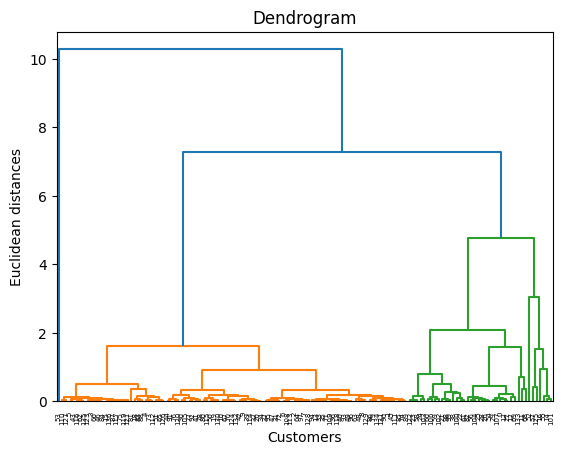

In [146]:
%matplotlib inline 
dendrogram = sch.dendrogram(sch.linkage(retailer_costumer[['Pct_Var_Price_25th',
       'Pct_Var_Price_50th', 'Pct_Var_Price_75th']], method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [161]:
print("Compute structured hierarchical clustering...")
n_clusters = 4 # number of retailers
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="ward"
)

Compute structured hierarchical clustering...


In [162]:
retailer_costumer['cluster'] = ward.fit_predict(retailer_costumer[['Pct_Var_Price_25th',
       'Pct_Var_Price_50th', 'Pct_Var_Price_75th']])

C:\Users\maiar\OneDrive\Data Material\Ascential - Analytics Engineering\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


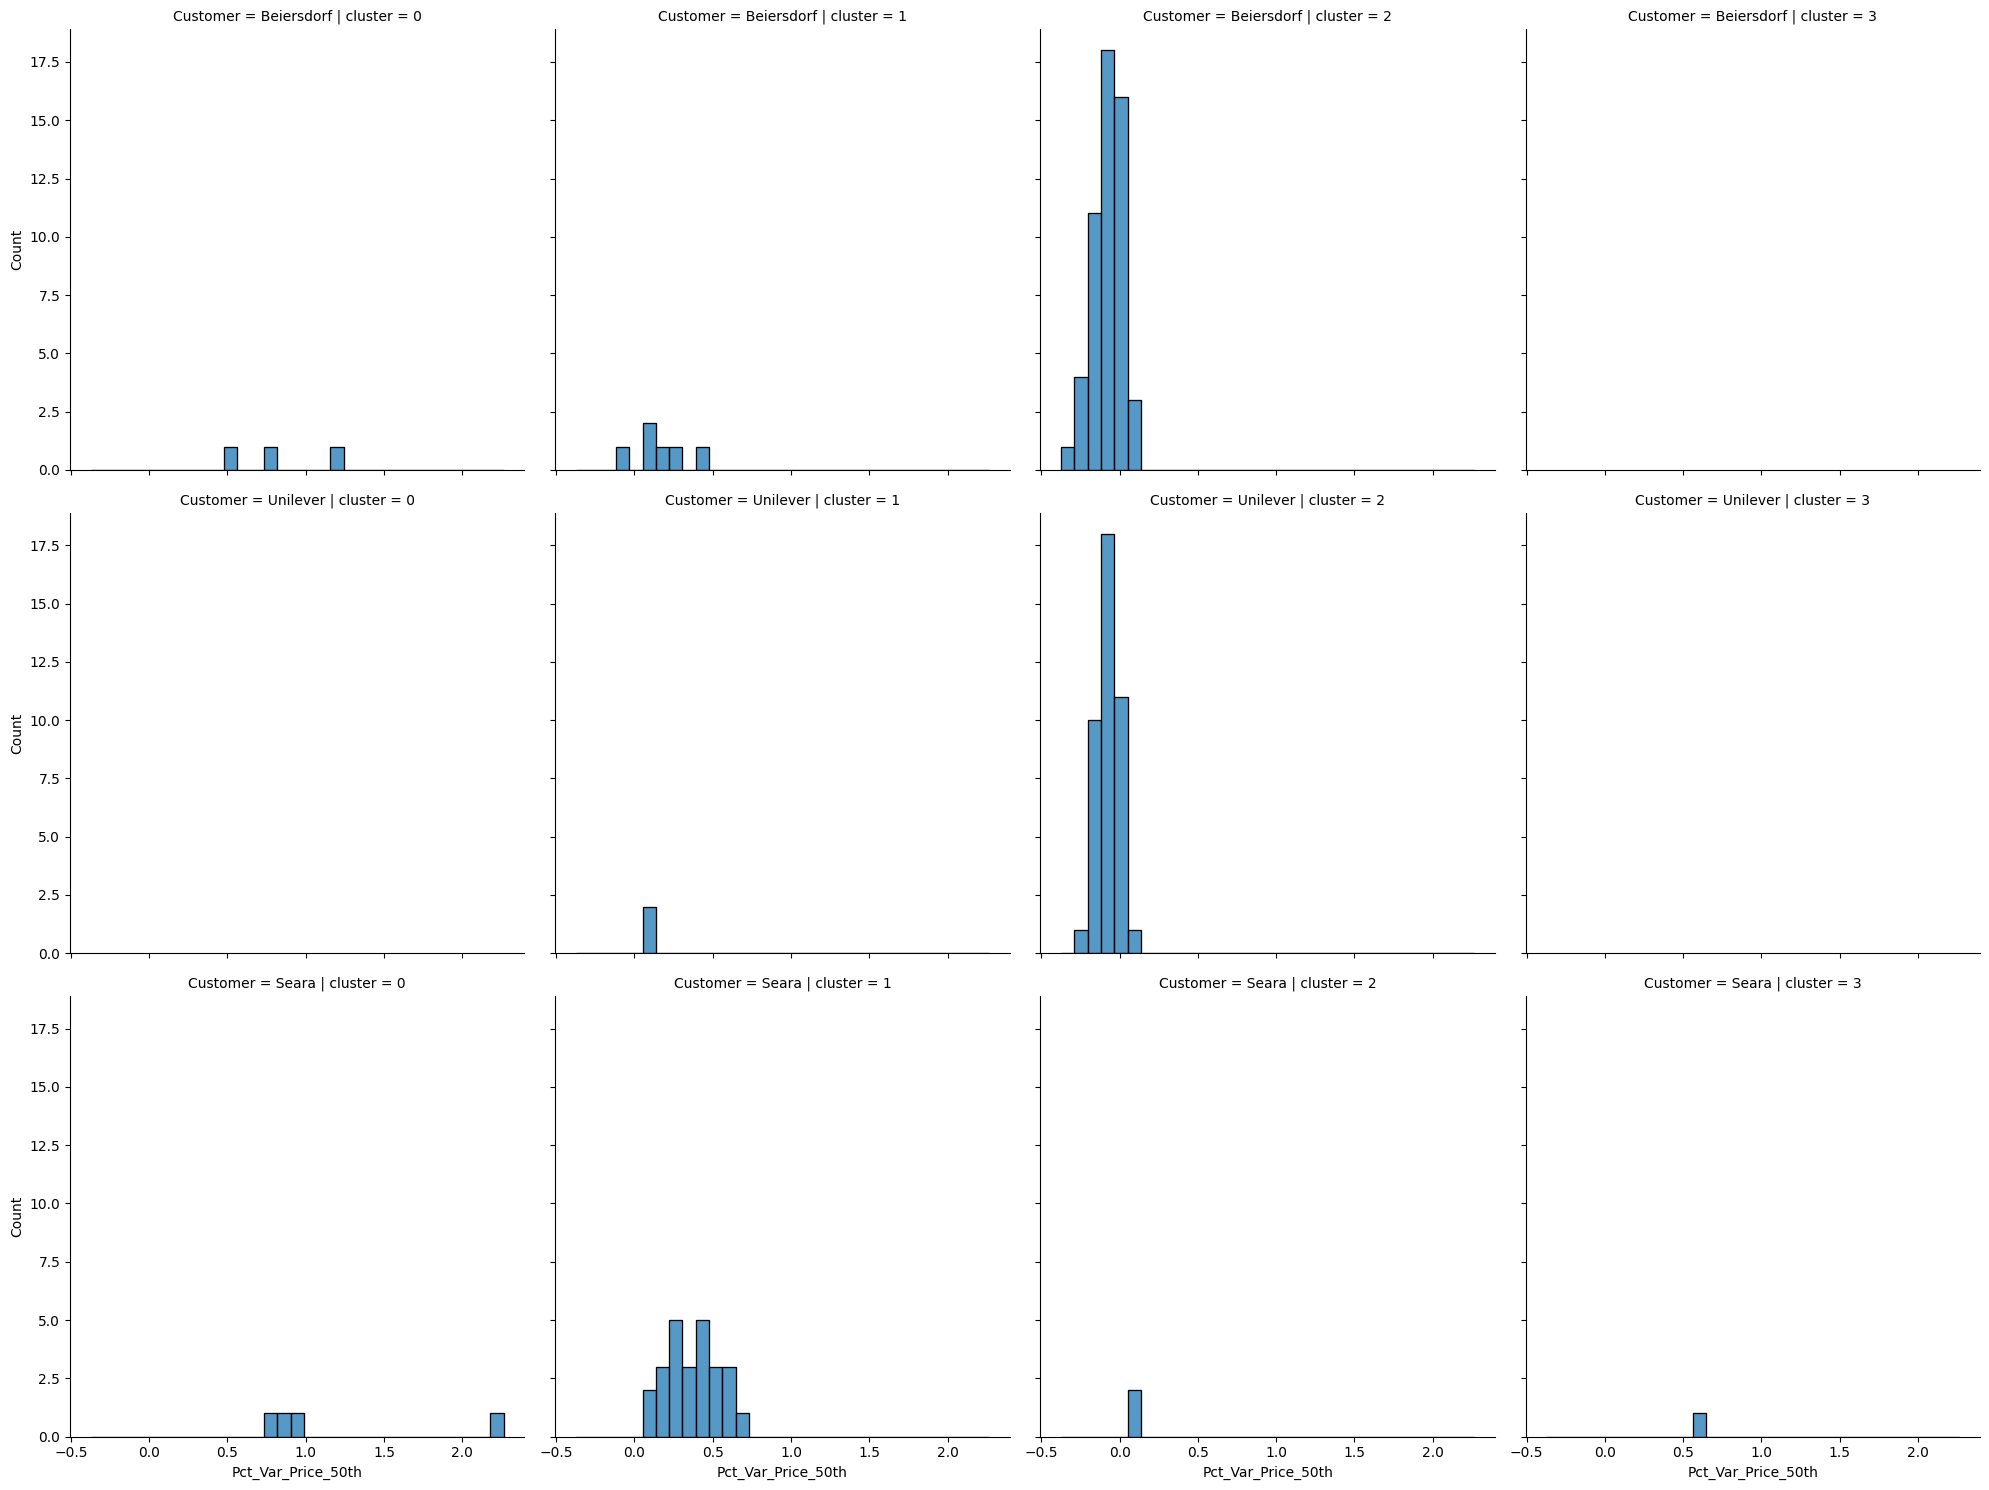

In [163]:
sns.displot(data=retailer_costumer, x='Pct_Var_Price_50th', col='cluster', row='Customer')

<Axes: xlabel='Available_mean', ylabel='Pct_Var_Price_50th'>

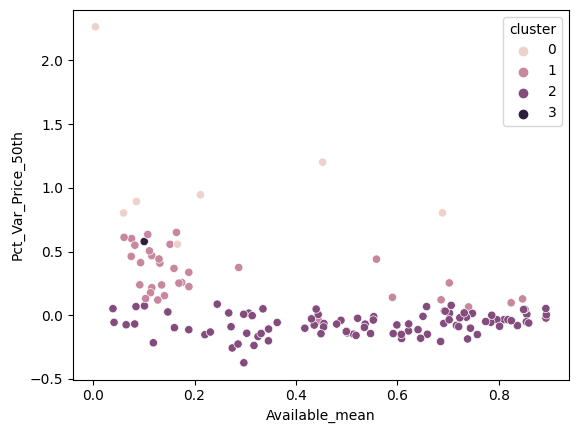

In [152]:
sns.scatterplot(data=retailer_costumer, x='Available_mean', y='Pct_Var_Price_50th', hue='cluster')

In [73]:
retailer = agg_df.groupby(['Retailer']).agg({('Pct_Var_Price', '_10th'):'mean', 
                                              ('Pct_Var_Price', '_25th'):'mean', 
                                              ('Pct_Var_Price', '_50th'):'mean', 
                                              ('Pct_Var_Price', '_75th'):'mean', 
                                              ('Pct_Var_Price', '_90th'):'mean', 
                                              ('Pct_Var_Price', '_10th'):'mean', 
                                              ('Available', 'mean'):'mean'})
retailer.columns = [''.join(col) for col in retailer.columns.values]
retailer.reset_index(inplace=True)
retailer.columns = ['Retailer', 'Pct_Var_Price_10th', 'Pct_Var_Price_25th',
       'Pct_Var_Price_50th', 'Pct_Var_Price_75th', 'Pct_Var_Price_90th',
       'Available_mean']

In [80]:
retailer

Retailer  Pct_Var_Price_10th  Pct_Var_Price_25th  \
0                      Amazon           -0.070464           -0.029002   
1            Amazon - Apoteca           -0.138524           -0.131069   
2              Amazon - Sages           -0.187690           -0.162372   
3     Angeloni - Supermercado           -0.152544           -0.146987   
4               Apoio Entrega           -0.130214           -0.117562   
..                        ...                 ...                 ...   
103  Supermercado Pague Menos           -0.048613           -0.029322   
104               Tenda Drive           -0.103816           -0.076238   
105                Ultrafarma           -0.017314            0.006404   
106                  Venancio           -0.097756           -0.055924   
107                  Zona Sul           -0.187684           -0.174156   

     Pct_Var_Price_50th  Pct_Var_Price_75th  Pct_Var_Price_90th  \
0              0.029725            0.104510            0.166449   
1             -0.108635           -0.083327           -0.044434   
2             -0.144345           -0.123065           -0.084955   
3             -0.132916           -0.124906           -0.103381   
4             -0.093094           -0.061690           -0.052496   
..                  ...                 ...                 ...   
103            0.006126            0.074313            0.100430   
104           -0.028551            0.016334            0.049449   
105            0.031621            0.051173            0.062578   
106            0.088973            0.645754            0.714325   
107           -0.143415           -0.100179           -0.044746   

     Available_mean  
0          0.751615  
1          0.345979  
2          0.591710  
3          0.628796  
4          0.215474  
..              ...  
103        0.657026  
104        0.430578  
105        0.694222  
106        0.785590  
107        0.387515  

[108 rows x 7 columns]

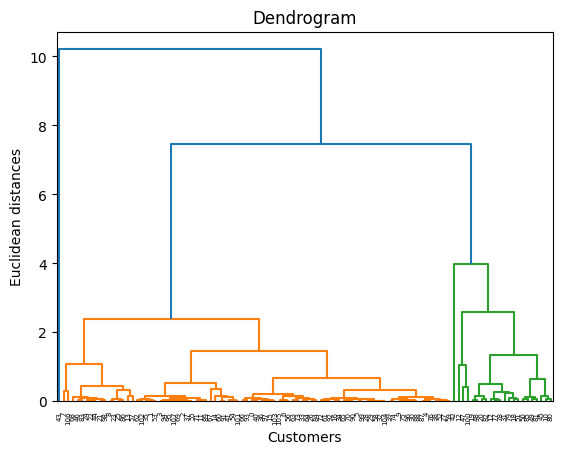

In [137]:
%matplotlib inline 
dendrogram = sch.dendrogram(sch.linkage(retailer[['Pct_Var_Price_25th',
       'Pct_Var_Price_50th', 'Pct_Var_Price_75th']], method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [139]:
print("Compute structured hierarchical clustering...")
n_clusters = 5 # number of retailers
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="ward"
)

Compute structured hierarchical clustering...


In [140]:
retailer['cluster'] = ward.fit_predict(retailer[['Pct_Var_Price_25th',
       'Pct_Var_Price_50th', 'Pct_Var_Price_75th']])

In [141]:
retailer.head()

Retailer  Pct_Var_Price_10th  Pct_Var_Price_25th  \
0                   Amazon           -0.070464           -0.029002   
1         Amazon - Apoteca           -0.138524           -0.131069   
2           Amazon - Sages           -0.187690           -0.162372   
3  Angeloni - Supermercado           -0.152544           -0.146987   
4            Apoio Entrega           -0.130214           -0.117562   

   Pct_Var_Price_50th  Pct_Var_Price_75th  Pct_Var_Price_90th  Available_mean  \
0            0.029725            0.104510            0.166449        0.751615   
1           -0.108635           -0.083327           -0.044434        0.345979   
2           -0.144345           -0.123065           -0.084955        0.591710   
3           -0.132916           -0.124906           -0.103381        0.628796   
4           -0.093094           -0.061690           -0.052496        0.215474   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0

C:\Users\maiar\OneDrive\Data Material\Ascential - Analytics Engineering\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


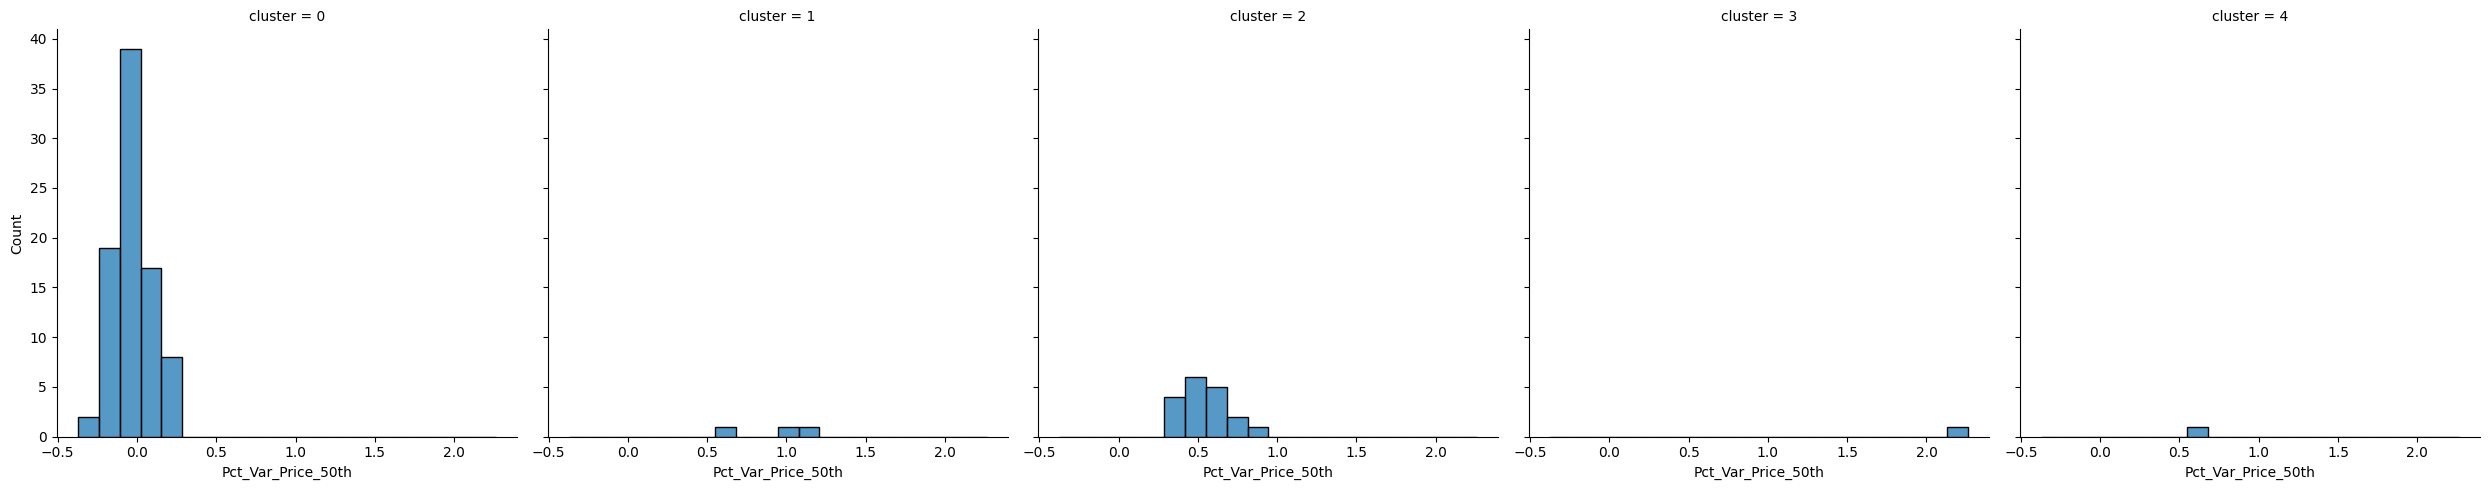

In [142]:
sns.displot(data=retailer, x='Pct_Var_Price_50th', col='cluster')

C:\Users\maiar\OneDrive\Data Material\Ascential - Analytics Engineering\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


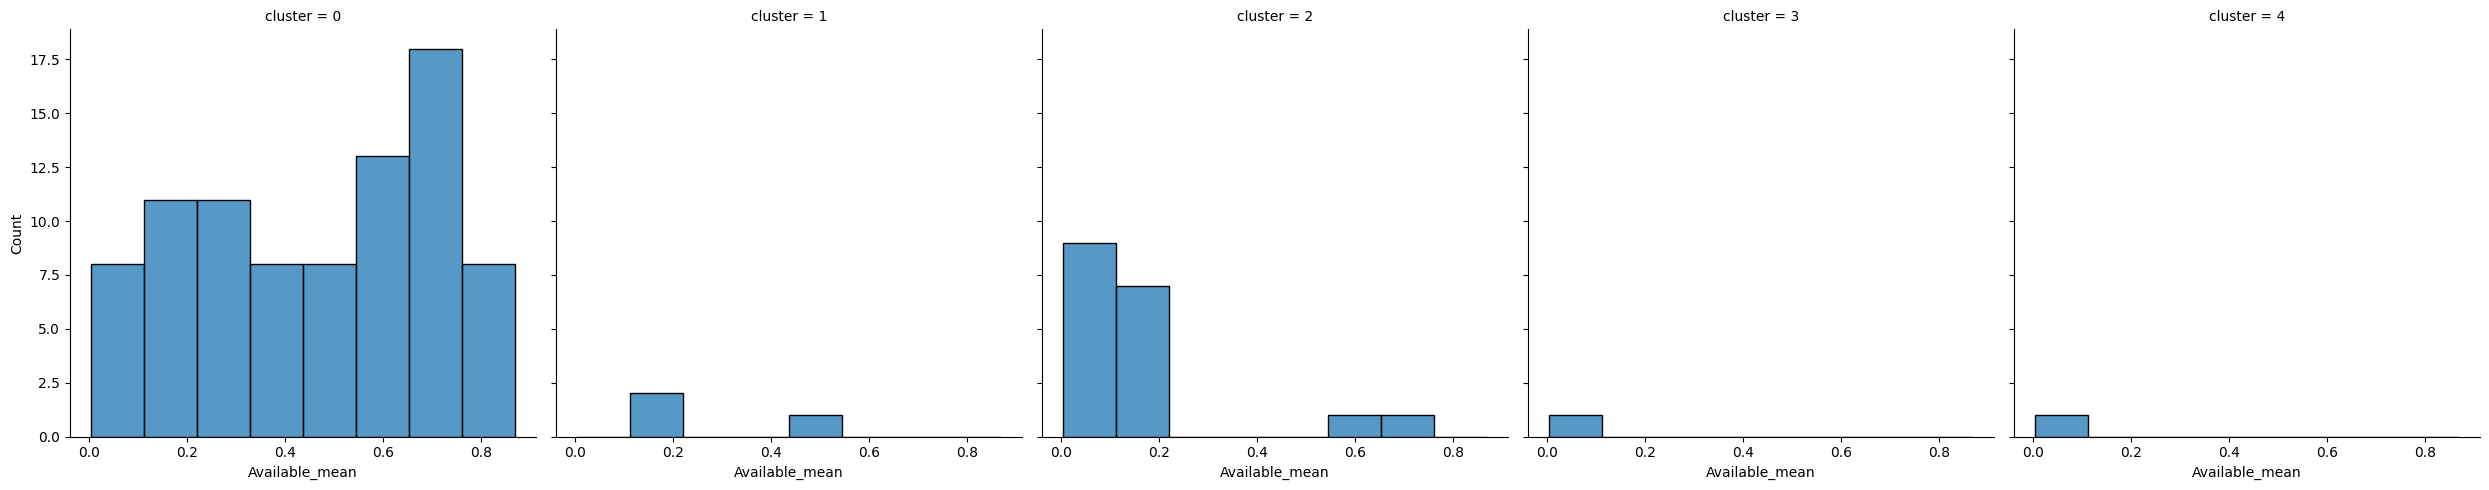

In [144]:
sns.displot(data=retailer, x='Available_mean', col='cluster')

<Axes: xlabel='Available_mean', ylabel='Pct_Var_Price_50th'>

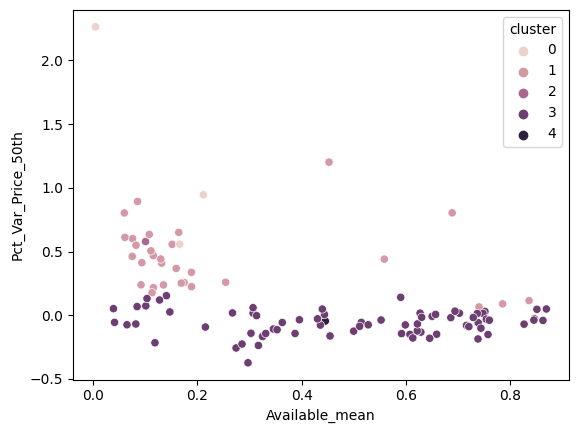

In [128]:
sns.scatterplot(data=retailer, x='Available_mean', y='Pct_Var_Price_50th', hue='cluster')

In [164]:
df

DateIns                                         Screenshot  \
0       2023-06-25  https://screenshot.intellibrand.ai/?reference=...   
1       2023-06-26  https://screenshot.intellibrand.ai/?reference=...   
2       2023-06-27  https://screenshot.intellibrand.ai/?reference=...   
3       2023-06-28  https://screenshot.intellibrand.ai/?reference=...   
4       2023-06-29  https://screenshot.intellibrand.ai/?reference=...   
...            ...                                                ...   
3773611 2023-05-05                                               None   
3773612 2023-06-27  https://screenshot.intellibrand.ai/?reference=...   
3773613 2023-06-28  https://screenshot.intellibrand.ai/?reference=...   
3773614 2023-06-29  https://screenshot.intellibrand.ai/?reference=...   
3773615 2023-06-30  https://screenshot.intellibrand.ai/?reference=...   

         Available  Unavailable  SuggestedPrice  FinalPrice  \
0                1            0             0.0       12.90   
1                1            0             0.0         NaN   
2                1            0             0.0       12.90   
3                1            0             0.0         NaN   
4                1            0             0.0       12.90   
...            ...          ...             ...         ...   
3773611          0            1            87.9         NaN   
3773612          1            0             6.2        7.39   
3773613          1            0             6.2        7.39   
3773614          1            0             6.2        7.99   
3773615          1            0             6.2        7.99   

                                 MasterKey_RetailerProduct  \
0            BRBeiersdorf4227721780101-03389-40Drogaria SP   
1            BRBeiersdorf4227721780101-03389-40Drogaria SP   
2            BRBeiersdorf4227721780101-03389-40Drogaria SP   
3            BRBeiersdorf4227721780101-03389-40Drogaria SP   
4            BRBeiersdorf4227721780101-03389-40Drogaria SP   
...                                                    ...   
3773611  BRBeiersdorf400590030871986062-03300-21SuperNosso   
3773612  BRBeiersdorf789117781685281685-03300-31Extra F...   
3773613  BRBeiersdorf789117781685281685-03300-31Extra F...   
3773614  BRBeiersdorf789117781685281685-03300-31Extra F...   
3773615  BRBeiersdorf789117781685281685-03300-31Extra F...   

         RandomPrecosNegativos  RandomPrecosMissing  RandomPrecosDiscrepantes  \
0                            1                  1.0                         0   
1                            1                  1.0                         1   
2                            1                  1.0                         0   
3                            1                  1.0                         1   
4                            1                  1.0                         0   
...                        ...                  ...                       ...   
3773611                      1                  1.0                         0   
3773612                      1                  1.0                         0   
3773613                      1                  1.0                         0   
3773614                      1                  1.0                         0   
3773615                      1                  1.0                         0   

         RandomPrecosDiscrepantesFator    Customer Department Category  \
0                             1.000000  Beiersdorf       Skin    Creme   
1                             4.493013  Beiersdorf       Skin    Creme   
2                             1.000000  Beiersdorf       Skin    Creme   
3                             4.890591  Beiersdorf       Skin    Creme   
4                             1.000000  Beiersdorf       Skin    Creme   
...                                ...         ...        ...      ...   
3773611                       1.000000  Beiersdorf       Skin      Sun   
3773612                       1.000000  Beiersdorf   PERSONAL      

In [191]:
price_ean = df.groupby(['EAN']).agg({'FinalPrice':'median'})
price_ean.reset_index(inplace=True)
price_ean.columns = ['EAN', 'FinalPrice_median']

In [192]:
price_df = df.merge(price_ean, on='EAN')

In [193]:
def pct_change(x):
    try:
        result = (x['FinalPrice'] - x['FinalPrice_median']) / x['FinalPrice_median']
        return result
    except:
        return np.nan

price_df['Pct_Var_Price'] = price_df.apply(lambda x: pct_change(x), axis=1)

In [197]:
price_df.columns

Index(['DateIns', 'Screenshot', 'Available', 'Unavailable', 'SuggestedPrice',
       'FinalPrice', 'MasterKey_RetailerProduct', 'RandomPrecosNegativos',
       'RandomPrecosMissing', 'RandomPrecosDiscrepantes',
       'RandomPrecosDiscrepantesFator', 'Customer', 'Department', 'Category',
       'Brand', 'EAN', 'Product', 'Retailer', 'FinalPrice_median',
       'Pct_Var_Price'],
      dtype='object')

In [207]:
price_df_retailer_ean = price_df.groupby(['Retailer', 'EAN']).agg({ 'Pct_Var_Price': [_10th, _25th, _50th, _75th, _90th],
                                                                    'Available': 'mean'})
price_df_retailer_ean.reset_index(inplace=True)

In [208]:
price_df_retailer_ean

Retailer            EAN Pct_Var_Price                      \
                                               _10th     _25th     _50th   
0      A Nossa Drogaria  5000456073240      0.078748  0.081151  0.141218   
1      A Nossa Drogaria  7896181900085      0.218951  0.218951  0.218951   
2      A Nossa Drogaria  7896181900115      0.171878  0.171878  0.171878   
3      A Nossa Drogaria  7896181900122           NaN       NaN       NaN   
4      A Nossa Drogaria  7896181900207           NaN       NaN       NaN   
...                 ...            ...           ...       ...       ...   
62295          Zona Sul    79400301161           NaN       NaN       NaN   
62296          Zona Sul   824980331069           NaN       NaN       NaN   
62297          Zona Sul  8710522675908     -0.103288 -0.103288 -0.103288   
62298          Zona Sul  8715200813061           NaN       NaN       NaN   
62299          Zona Sul  8720181040252      0.005349  0.005349  0.069534   

                          Available  
          _75th     _90th      mean  
0      0.141218  0.141218  1.000000  
1      0.218951  0.218951  1.000000  
2      0.171878  0.171878  1.000000  
3           NaN       NaN  0.000000  
4           NaN       NaN  0.000000  
...         ...       ...       ...  
62295       NaN       NaN  0.000000  
62296       NaN       NaN  0.000000  
62297  0.180717  0.180717  1.000000  
62298       NaN       NaN  0.000000  
62299  0.069534  0.069534  0.918033  

[62300 rows x 8 columns]

In [210]:
price_df_retailer_ean.columns

MultiIndex([(     'Retailer',      ''),
            (          'EAN',      ''),
            ('Pct_Var_Price', '_10th'),
            ('Pct_Var_Price', '_25th'),
            ('Pct_Var_Price', '_50th'),
            ('Pct_Var_Price', '_75th'),
            ('Pct_Var_Price', '_90th'),
            (    'Available',  'mean')],
           )

In [211]:
price_df = price_df_retailer_ean.groupby(['Retailer']).agg({('Pct_Var_Price', '_10th'):'mean', 
                                              ('Pct_Var_Price', '_25th'):'mean', 
                                              ('Pct_Var_Price', '_50th'):'mean', 
                                              ('Pct_Var_Price', '_75th'):'mean', 
                                              ('Pct_Var_Price', '_90th'):'mean', 
                                              ('Pct_Var_Price', '_10th'):'mean', 
                                              ('Available', 'mean'):'mean'})
price_df.reset_index(inplace=True)

In [217]:
price_df.reset_index()
price_df.columns = [''.join(column) for column in price_df.columns.values]

In [228]:
price_df.columns

Index(['Retailer', 'Pct_Var_Price_10th', 'Pct_Var_Price_25th',
       'Pct_Var_Price_50th', 'Pct_Var_Price_75th', 'Pct_Var_Price_90th',
       'Availablemean'],
      dtype='object')

<Axes: >

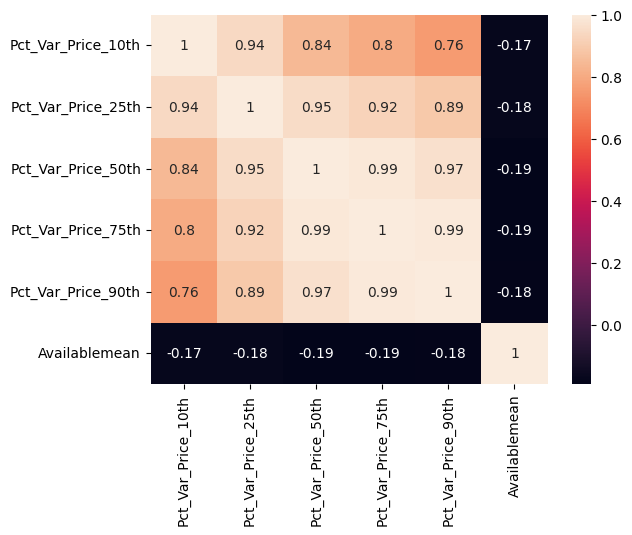

In [230]:
corr_df = price_df[['Pct_Var_Price_10th', 'Pct_Var_Price_25th',
       'Pct_Var_Price_50th', 'Pct_Var_Price_75th', 'Pct_Var_Price_90th',
       'Availablemean']]
sns.heatmap(corr_df.corr(), annot=True)

C:\Users\maiar\OneDrive\Data Material\Ascential - Analytics Engineering\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


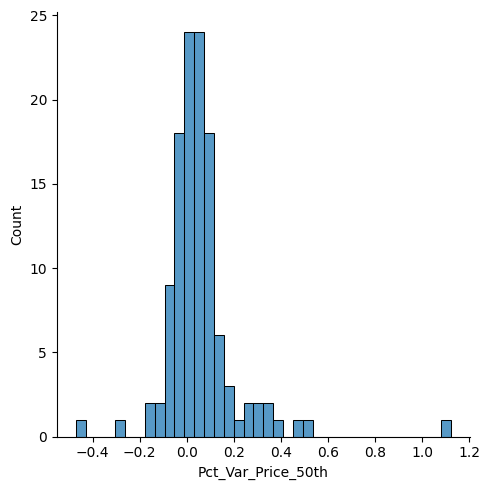

In [222]:
sns.displot(data=price_df, x='Pct_Var_Price_50th')

<Axes: xlabel='Pct_Var_Price_50th', ylabel='Pct_Var_Price_10th'>

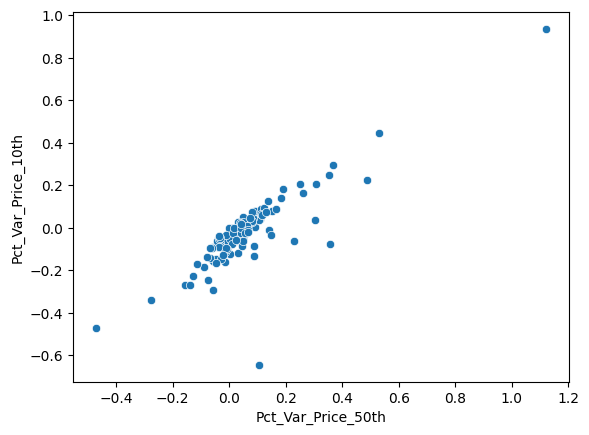

In [232]:
sns.scatterplot(data=price_df, y='Pct_Var_Price_10th', x='Pct_Var_Price_50th')

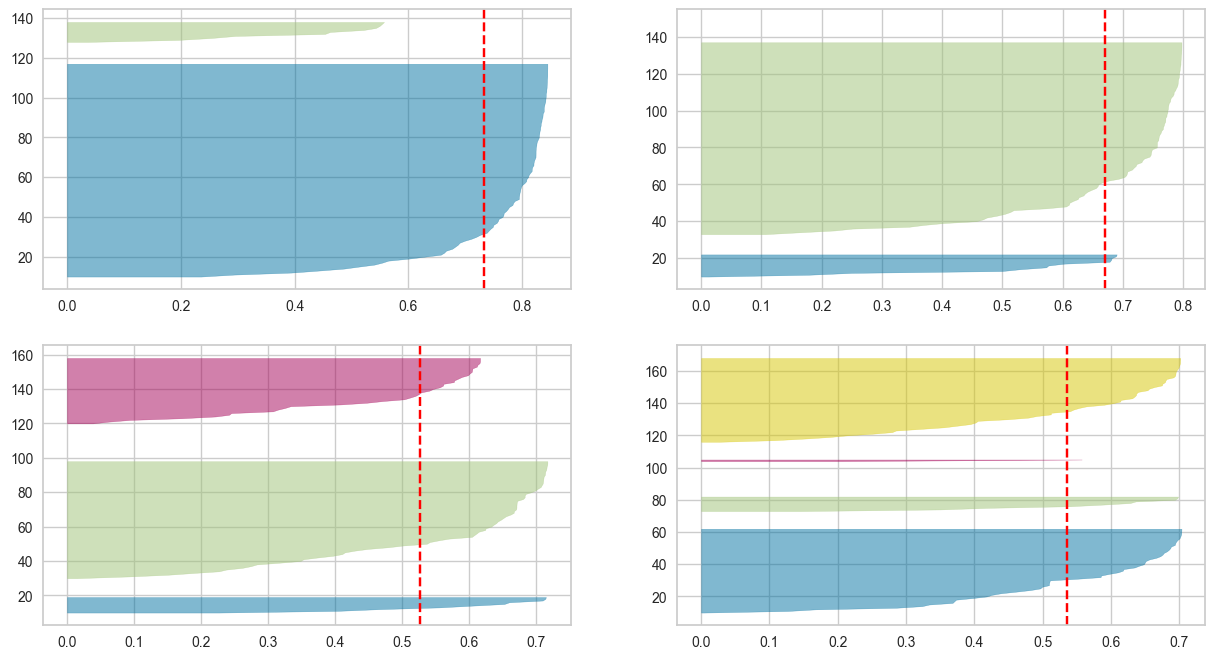

In [261]:
from yellowbrick.cluster import SilhouetteVisualizer

x = price_df[price_df['Pct_Var_Price_50th'].notnull()][['Pct_Var_Price_50th']]

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x) 

In [266]:
x = price_df[price_df['Pct_Var_Price_50th'].notnull()][['Pct_Var_Price_50th', 'Retailer']]

<PandasArray>
[
[0.09025159304839991],
[-0.08720826201538281],
[0.09731092065251198],
[0.08715926984088851],
[0.11386260864227674],
[-0.01327252226566134],
[0.01929766882694113],
[-0.11355259920663134],
[0.10633626024225562],
[0.040509510098435966],
[0.04341431340066476],
[-0.47227428494143775],
[0.061828483855957156],
[-0.15577074954498657],
[-0.057440230002292765],
[0.23083728405023415],
[-0.047637894066213965],
[-0.00292021598285318],
[0.049158627419838244],
[0.30881163149600493],
[0.02022743693160136],
[0.07103457199116166],
[0.08404259550520808],
[0.0913212307295946],
[0.10859572804365354],
[0.10722514320367142],
[0.06698464489928335],
[0.18250422316637885],
[0.02731252807542611],
[0.016356293155963413],
[0.017845315664928328],
[-0.05606625224769767],
[-0.03892043444184463],
[0.03237036819322114],
[-0.06835093988104486],
[0.021530998514598436],
[-0.01971512283920606],
[-0.0009155674436007769],
[0.08495433367403882],
[-0.03871429966875023],
[0.07985085288704429],
[0.531861006230207

In [282]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100)
x['cluster'] = kmeans.fit_predict(x['Pct_Var_Price_50th'].array.reshape(-1, 1))

C:\Users\maiar\OneDrive\Data Material\Ascential - Analytics Engineering\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


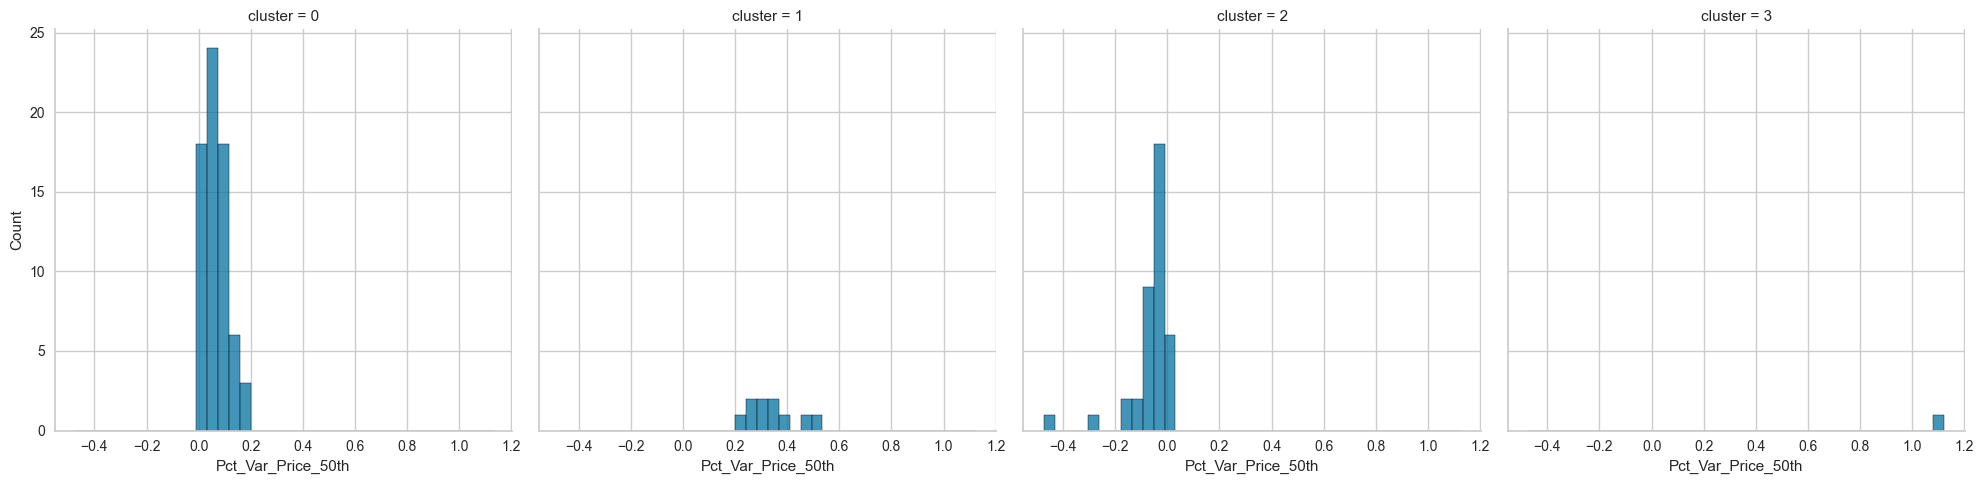

In [283]:
sns.displot(data=x, x='Pct_Var_Price_50th', col='cluster')

In [290]:
x[x['cluster'] == 2]

Pct_Var_Price_50th                                        Retailer  \
1             -0.087208                                          Amazon   
5             -0.013273                                   Apoio Entrega   
7             -0.113553                                        Atacadão   
11            -0.472274                                       Care Shop   
13            -0.155771                                       Carrefour   
14            -0.057440                              Carrefour - Nações   
16            -0.047638                         Confiança Supermercados   
17            -0.002920                                 Coop - Drogaria   
31            -0.056066                                          Drogal   
32            -0.038920                            Drogaria Catarinense   
34            -0.068351                                Drogaria Rosário   
36            -0.019715                                 Drogarias Globo   
37            -0.000916                                Drogarias Tamoio   
40            -0.038714                                     Extra Farma   
48            -0.033234                                Farmácia Indiana   
50            -0.275703               Ifood - Atacadão - Vila Guilherme   
58            -0.001726  Ifood - Supermarket Mercado Torre - Praça Seca   
64            -0.048000                                      Loja Nivea   
69            -0.012830                                     Mateus Mais   
70            -0.029060           Mateus Mais - Hiper Mateus Renascença   
71            -0.126617                                   Mercado Livre   
72            -0.030877                      Mercado Livre - Drogão Net   
74            -0.045038              Mercado Livre - Loja Oficial Nivea   
76            -0.041954                                Merqueo - Brasil   
81            -0.035489                                     Pague Menos   
84            -0.009477                                        Prezunic   
90            -0.013934                           Rappi - Festval Turbo   
91            -0.136758         Rappi - Fort Atacadista - Florianópolis   
92            -0.035581               Rappi - Mundial - Jardim Oceânico   
93            -0.030486                       Rappi - Mundial - Niterói   
95            -0.059147                         Rappi - Turbo - Aldeota   
103           -0.034721                                   Santo Remedio   
104           -0.006082                                       Savegnago   
105           -0.074737                     Shopee - Loja Oficial Nivea   
112           -0.057005                      Supermercado Cidade Canção   
115           -0.009313                        Supermercado Pague Menos   
116           -0.077002                                     Tenda Drive   
117           -0.067341                                      Ultrafarma   
118           -0.022944                                        Venancio   

     cluster  
1          2  
5          2  
7          2  
11         2  
13         2  
14         2  
16         2  
17         2  
31         2  
32         2  
34         2  
36         2  
37         2  
40         2  
48         2  
50         2  
58         2  
64         2  
69         2  
70         2  
71         2  
72         2  
74         2  
76         2  
81         2  
84         2  
90         2  
91         2  
92         2  
93         2  
95         2  
103        2  
104        2  
105        2  
112        2  
115        2  
116        2  
117        2  
118        2

(3773616, 18)